### Task 1: Plot the evolution of the stock and the log-returns and investigate their mean, std, minimum, maximum and their quantiles

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [333]:
data = pd.read_csv("Telekom.csv")
data.head()

,Date,Close
0,2014-06-17,12.585
1,2014-06-18,12.660
2,2014-06-19,12.800
3,2014-06-20,12.735
4,2014-06-23,12.675


In [334]:
data.dtypes

Date      object
Close    float64
dtype: object

In [335]:
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [336]:
if len(data.columns) == 2:
    data.set_index('Date',inplace=True)
    print('Date is the new index of data')


Date is the new index of data


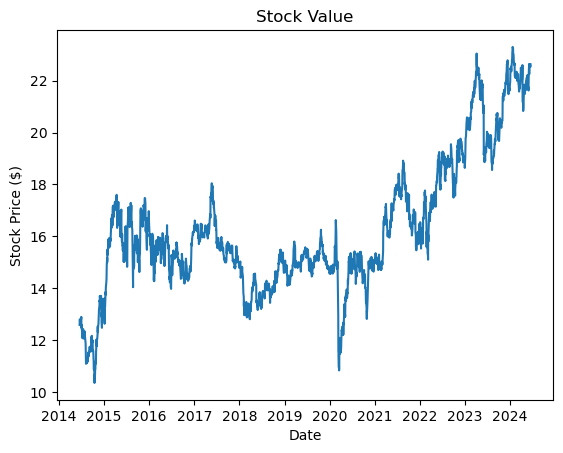

In [337]:
plt.title('Stock Value')
plt.plot(data["Close"])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(False)

In [338]:
stats = [

    ('Mean', data['Close'].mean()),
    ('Std Dev', data['Close'].std()),
    (f"Min (on {data['Close'].idxmin().date()})", data['Close'].min()),
    (f"Max (on {data['Close'].idxmax().date()})", data['Close'].max()),
    ('25% Quantile (Q1)', data['Close'].quantile(0.25)),
    ('Median (Q2)', data['Close'].quantile(0.50)),
    ('75% Quantile (Q3)', data['Close'].quantile(0.75)),
]

# Turn the list into a DataFrame and keep the name 'stats'
stats = pd.DataFrame(stats, columns=['Statistics of Returns', 'Value'])
stats['Value'] = round(stats['Value'],2)
stats


,Statistics of Returns,Value
0,Mean,16.28
1,Std Dev,2.59
2,Min (on 2014-10-16),10.35
3,Max (on 2024-01-22),23.30
4,25% Quantile (Q1),14.77
5,Median (Q2),15.64
6,75% Quantile (Q3),17.48


The log returns are defined as
$$
r_t = ln\left(\frac{P_{t}}{P_{t-1}}\right) = ln(P_{t})-ln(P_{t-1})
$$

In [339]:
logPrices = np.log(np.array(data["Close"]))
data["LogReturn"] = np.log(data['Close']).diff()
data.tail()

,Close,LogReturn
Date,,
2024-06-10,22.610001,0.000885
2024-06-11,22.610001,0.000000
2024-06-12,22.540001,-0.003101
2024-06-13,22.530001,-0.000444
2024-06-14,22.629999,0.004429


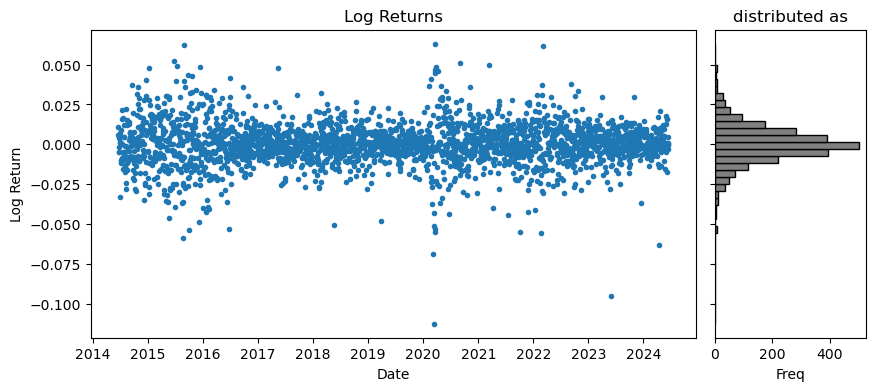

In [340]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [4, 1], 'wspace': 0.05})

ax1.plot(data.index, data['LogReturn'], marker='.', ls='')
ax1.set_title('Log Returns')
ax1.set_xlabel('Date')
ax1.set_ylabel('Log Return')

ax2.set_title('distributed as')
ax2.hist(data['LogReturn'].dropna(), bins=40, orientation='horizontal', color='gray', edgecolor='black',density=False)
ax2.set_xlabel('Freq')
ax2.tick_params(labelleft=False)  # Hide y-axis labels on histogram


plt.show()

In [341]:
logReturns = data['LogReturn'].dropna()
logstats = {
    'Mean': logReturns.mean(),
    'Std': logReturns.std(),
    'Minimum': logReturns.min(),
    'Maximum': logReturns.max(),
    '25% Quantile (Q1)': logReturns.quantile(0.25),
    'Median (Q2)': logReturns.quantile(0.50),
    '75% Quantile (Q3)': logReturns.quantile(0.75),
}

# Convert to DataFrame
pd.DataFrame.from_dict(logstats, orient='index', columns=['Value'])

,Value
Mean,0.000231
Std,0.013379
Minimum,-0.112673
Maximum,0.063141
25% Quantile (Q1),-0.005909
Median (Q2),0.000000
75% Quantile (Q3),0.007092


### 📈 Task 2 – Fit the Black-Scholes Model to `Telecom.csv`

In this task, we estimate the parameters of the **Black-Scholes model** using historical price data from `Telecom.csv`.

---

🧾 **Black-Scholes Model**

The Black-Scholes model assumes the asset price follows the stochastic differential equation (SDE):

$$
dP_t = P_t \left( b\,dt + \sigma\,dW_t \right)
$$

Applying **Itô's Lemma** to the logarithm of the price process, we obtain:

$$
d(\log P_t) = \left(b - \frac{1}{2} \sigma^2 \right) dt + \sigma\, dW_t
$$

---

🔍 **Estimation via Log Returns**

Using a time series of prices \( P_t \), we approximate the differential of the log price by the **discrete log return**:

$$
r_t \approx \log(P_{t+1}) - \log(P_t)
$$

From this, we can estimate the model parameters:

- **Volatility (σ)**:
  $$
  \sigma \approx \text{std}(r_t)
  $$

- **Drift (b)**:
  $$
  b \approx \text{mean}(r_t) + \frac{1}{2} \sigma^2
  $$

---

⏱️ Time Units and Annualization

These estimates are computed per trading day. To convert to **annualized values**, use:

- $\sigma_{\text{annual}} = \sigma_{\text{daily}} \cdot \sqrt{252}$
- $b_{\text{annual}} = b_{\text{daily}} \cdot 252$

> 📝 Note: 252 is the typical number of trading days in a year.

---




In [344]:
P0 = np.array(data["Close"])[0]
r = 0.02  # by assumption
sigma = logstats["Std"] * np.sqrt(252)
b = logstats["Mean"] * 252 + 0.5 * sigma * sigma

print('The parameters of the Black-Scholes Model are:')
print(f'Initial Price P0 ($):       {P0:.2f}')
print(f'Interest Rate (annual):    {r:.2%}')
print(f'Volatility σ (annual):      {sigma:.4f}')
print(f'Drift b (annual):               {b:.4f}')

The parameters of the Black-Scholes Model are:
Initial Price P0 ($):       12.59
Interest Rate (annual):    2.00%
Volatility σ (annual):      0.2124
Drift b (annual):               0.0808
